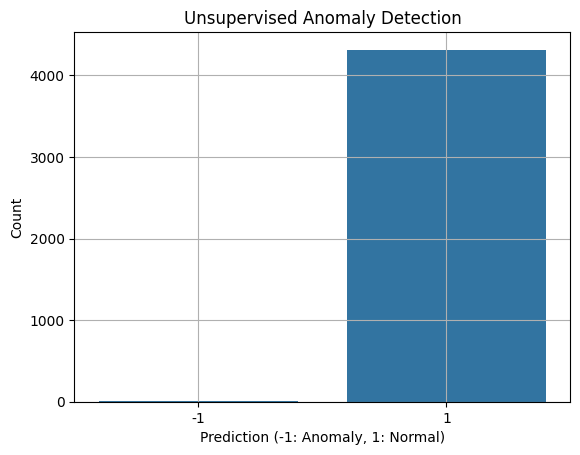

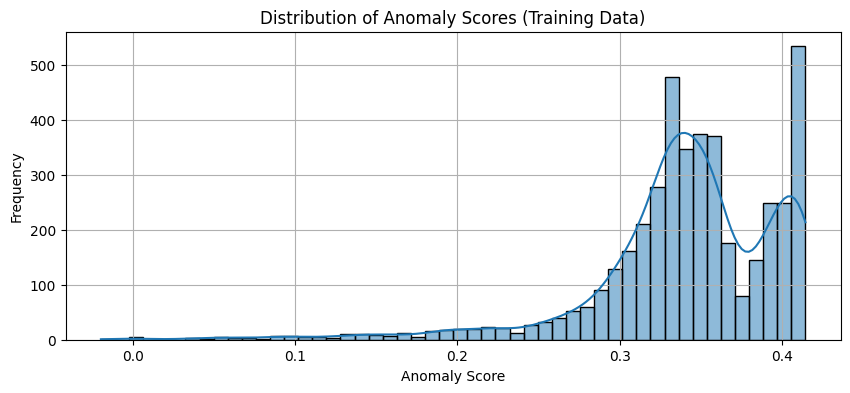

In [ ]:
# STEP 1: Install necessary packages
!pip install -q scikit-learn pandas matplotlib seaborn joblib

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib

# STEP 3: Load the CSV file from Google Drive
file_path = "/content/drive/MyDrive/Normal_traffic.pcap_Flow.csv"
df = pd.read_csv(file_path)

# STEP 4: Define the 13 selected features
selected_features = [
    'Flow Duration',
    'Total Fwd Packet',
    'Total Bwd packets',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'Average Packet Size',
    'Packet Length Std',
    'Subflow Bwd Bytes',
    'FWD Init Win Bytes'
]

# STEP 5: Clean and preprocess the data
# Replace inf and NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Extract feature set
X = df[selected_features]

# STEP 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 7: Train the Isolation Forest Model (optimized)
model = IsolationForest(contamination=0.001, n_estimators=150, random_state=42)
model.fit(X_scaled)

# STEP 8: Save the model and scaler
joblib.dump(model, "/content/drive/MyDrive/isolation_forest_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/isolation_forest_scaler.pkl")

# STEP 9: Visual Evaluation
df["Anomaly_Score"] = model.decision_function(X_scaled)
df["Anomaly"] = model.predict(X_scaled)  # -1 for anomaly, 1 for normal

# Plot anomaly distribution
sns.countplot(x="Anomaly", data=df)
plt.title("Unsupervised Anomaly Detection")
plt.xlabel("Prediction (-1: Anomaly, 1: Normal)")
plt.ylabel("Count")
plt.grid()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df["Anomaly_Score"], bins=50, kde=True)
plt.title("Distribution of Anomaly Scores (Training Data)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.grid()
plt.show()
